In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns' ,None)
pd.pandas.set_option('display.max_rows' ,None)

#featureengineering
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

#classifiers
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score
from sklearn.model_selection import cross_val_score,GridSearchCV

In [19]:
df=pd.read_csv("Job_Placement_Data.csv")

In [20]:
X=df.drop(columns='status',axis=1)
y = df['status'].map({'Placed':1,'Not Placed':0})

In [21]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [22]:
X = preprocessor.fit_transform(X)

In [23]:
X.shape

(215, 21)

In [24]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((172, 21), (43, 21))

In [63]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [56]:

def evaluate_model(true, predicted):
    acc_score = accuracy_score(true, predicted)
    class_report = classification_report(true, predicted)
    return acc_score, class_report

In [57]:
models={
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'AdaBoost':AdaBoostClassifier(),
    'GradientBoosting' : GradientBoostingClassifier()
}

In [60]:
model_list = []
accuracy_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    train_accuracy_score,train_classification_report= evaluate_model(y_train, y_train_pred)

    test_accuracy_score,test_classification_report= evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy Score: {:.4f}".format(train_accuracy_score))
    print(train_classification_report)
    

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy Score:: {:.4f}".format(test_accuracy_score))
    print(test_classification_report)
    accuracy_list.append(test_accuracy_score)
    
    print('='*50)
    print('\n')

LogisticRegression
Model performance for Training set
- Accuracy Score: 0.8953
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        55
           1       0.91      0.94      0.92       117

    accuracy                           0.90       172
   macro avg       0.89      0.87      0.88       172
weighted avg       0.89      0.90      0.89       172

----------------------------------
Model performance for Test set
- Accuracy Score:: 0.8837
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43



GaussianNB
Model performance for Training set
- Accuracy Score: 0.8314
              precision    recall  f1-score   support

           0       0.73      0.75      0.74    

In [61]:
pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Accuracy_Score']).sort_values(by=["Accuracy_Score"],ascending=False)

,Model Name,Accuracy_Score
0,LogisticRegression,0.883721
6,AdaBoost,0.860465
3,DecisionTreeClassifier,0.837209
5,SVC,0.813953
7,GradientBoosting,0.813953
4,RandomForestClassifier,0.790698
1,GaussianNB,0.744186
2,KNeighborsClassifier,0.744186


Accuracy Score : 0.8837209302325582
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43

Confusion matrix, without normalization


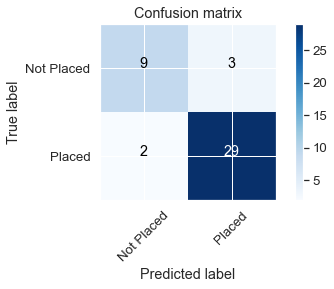

In [67]:
regressor = LogisticRegression()
regressor.fit(X_train,y_train)

y_pred=regressor.predict(X_test)

print(f"Accuracy Score : {accuracy_score(y_test,y_pred)}")
print(classification_report(y_test,y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Not Placed', 'Placed'])